# Questions:
------
#### The data set I chose to analyse is the Titanic Data from Kaggle website, following are the questions I am going to investigate:

1. What factors made people more likely to survive? Such as:
    - Gender (Sex)
    - Passenger Class (Pclass)
    - Age
    - Embarked

2. If I was on Titaic, how should I purchase the ticket in order to have higher survive rate? With following condition:
    - Male
    - Age 25-30
    - no children/no partner

# Findings:
------

According in the movie ‘Titanic’, women and children were first aboard the lifeboats when the Titanic Struck an iceberg and sank to the bottom of the North Atlantic.
This gives the first clue that the female and children might have higher survival rate (SR) than male passengers. In order to investigate these factors, the data were grouped by ‘Sex’ and ‘Age’.

As calculated in script SC1, there are 314 female and 577 male passengers in the data set. Although the total male passengers are almost double the female passengers , female has 74.2% of SR and male has only 18.9% of SR (See figure 1). That was due to the women had been given the priority to board the lifeboats.

In figure 5, the bar chart shows the survivor who is in age 0 - 5 group has highest SR which is about 0.68, then the SR drops down to around 0.3~0.5 for the rest age ranges. Despite that, the group of age 5 - 15 still has high SR. This proved that children had also been given the priority to board the lifeboats.

In figure 4, the survivors with unknown ages have been categorised as ‘nan’ and this group of people has the highest survived number in all age groups. However, by comparing to figure 5, its SR is sitting at the bottom. This is because 81.6 % of the victims with unknown age are from class 3 (See SC5) and people in 3rd class were primarily immigrants, hence there are no record of their birthday.

In term of SR in passengers class, the figure 2 shows that 1st class has the highest SR which is 63%, 2nd class has about 47.3% SR and the 3rd class only has 24.2% SR. This is because the the lifeboats were located at the upper deck where was very close to the 1st class cabin. As shown in SC6, 91 female survivors from 1st class, 70 female survivors from 2nd class and 72 female survivors from 3rd class.

In the record, Titanic departed from three ports, such as Cherbourg, Queenstown and Southampton. With the analysis in figure 3, it shows the passengers from Cherbourg has higher chance to survive since it has about 55.4% of SR, This might indicate the passengers from Cherbourg are either richer or female dominated. However, this shouldn’t be considered as a significant factor to impact on the SR.

Imaging I was about to purchase a Titanic ticket, How should I purchase? Following is my personal condition:
I am a guy hence I would only have 18.9% to survive. 
My age is in between 25-30 years old
I am going alone, hence no other partners with me
I want to survive
After a series of filtering on data set, the SC7 script shows there would be only 5 tickets from 1st class and 9 tickets from 3rd class available for me. 6 out of 9 tickets could be purchased from Southampton. Therefore, I should buy the 3rd class tickets and embarked at Southampton.


# Conclusions:
---

This analysis explored the survival rate with different groups of passengers’ gender, age and passenger class on the Titanic shipwreck. The results indicate female and children are most lightly to survive and passengers from 1st class also have the higher chance to survive.

The data set has limitations for the analysis, such as the missing value in the age group. It turns out the unknown age group has the most survivors in the ‘age_rank’ category (as shown in figure 4) and most of the unknown age passengers were allocated to 3rd class cabin. In addition, the new column could be added to determine if the passenger got on the lifeboat.


# Coding Section:
------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def survival_rate_by_group(grouped_name):
    survival_rate = {}
    grouped_data = titanic_data.groupby(grouped_name)
    total = grouped_data.size()
    for name, group in grouped_data:
        
        survival_rate[name] = group['Survived'].sum()/float(total[name])
    return survival_rate


In [4]:
def show_pie_chart(plt, labels, data):
    colors = ['yellowgreen', 'lightcoral']
    explode = (0, 0.1)
    plt.pie(data, explode = explode, colors = colors,
           autopct='%1.1f%%', shadow=True, startangle=90)

    # Set aspect ratio to be equal so that pie is drawn as a circle.

    plt.legend(labels,loc='lower right',fontsize=10)
    plt.axis('equal')

In [5]:
def show_chart_by_group(grouped_name):
    datas = survival_rate_by_group(grouped_name)

    f, ax = plt.subplots(1, len(datas), sharex=True)
    count = 0
    for key, value in datas.items():
        key = str(key)
        labels = [key + ' Survivors', key + ' Victims']
        data = [value, 1 - value]
        show_pie_chart(ax[count], labels, data)
        count += 1

In [6]:
def group_age_rank(age):    
    result = 'nan'
    if age != 'nan':
        gap = 5
        max_age = titanic_data['Age'].max()
        top_rank = int(ceil(max_age/gap))
        for i in range(top_rank):
            if age < i*gap:
                result = str((i - 1)*gap) + ' - '  + str(i*gap)                
                break
    return result

# Data Wrangling Phase:
----

### Create New Column
Since the age column has been filled up with various numbers, it is not efficient to group the age column by itself. The function ‘group_age_rank’ is used to categorise the age numbers into different age rank/band and a new column [Age_rank] has also been created after applying the function to the original data set.

### Missing Values
In this dataset, there are missing values in both Age and Cabin columns. Since we are more interesting in how the age factor would impact on the survivor rate, we are going to ignore the missing value in Cabin column.

For the missing value in Age group, the function ‘group_age_rank’ is used to categorise them into a ‘nan’ age rank. The reason I didn’t exclude this ‘nan’ group in the further analysis is because I would like to see how many people with unknown age have survived, what’s the survival rate and where are these group of people came from (i.e. why they are marked with unknown age)



In [7]:
# SC0 - Insert new column
titanic_data['Age_rank']=titanic_data['Age'].apply(group_age_rank)

# Statistic Data:
-----

In [8]:
# SC1 - Statistic by gender
grouped_by_gender = titanic_data.groupby('Sex')
print 'Total passengers in different gender：'
print grouped_by_gender['Survived'].size()
print '\n'
print 'Total survivors in different gender：'
print grouped_by_gender['Survived'].sum()

Total passengers in different gender：
Sex
female    314
male      577
dtype: int64


Total survivors in different gender：
Sex
female    233
male      109
Name: Survived, dtype: int64


In [9]:
# SC2 - Statistic by passenager class
grouped_by_gender = titanic_data.groupby('Pclass')
print 'Total passengers in different Classes：'
print grouped_by_gender['Survived'].size()
print '\n'
print 'Total survivors in different Classes：'
print grouped_by_gender['Survived'].sum()

Total passengers in different Classes：
Pclass
1    216
2    184
3    491
dtype: int64


Total survivors in different Classes：
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [10]:
# SC3 - Statistic by passenager age
grouped_by_gender = titanic_data.groupby('Age_rank')
print 'Total passengers in different age：'
print grouped_by_gender['Survived'].size()
print '\n'
print 'Total survivors in different age：'
print grouped_by_gender['Survived'].sum()

Total passengers in different age：
Age_rank
0 - 5       40
10 - 15     16
15 - 20     86
20 - 25    114
25 - 30    106
30 - 35     95
35 - 40     72
40 - 45     48
45 - 50     41
5 - 10      22
50 - 55     32
55 - 60     16
60 - 65     15
65 - 70      4
70 - 75      6
nan        178
dtype: int64


Total survivors in different age：
Age_rank
0 - 5      27
10 - 15     7
15 - 20    34
20 - 25    39
25 - 30    38
30 - 35    40
35 - 40    33
40 - 45    18
45 - 50    16
5 - 10     11
50 - 55    14
55 - 60     6
60 - 65     6
65 - 70     0
70 - 75     0
nan        53
Name: Survived, dtype: int64


In [11]:
# SC4 - Statistic by unknown age and class
grouped_by_pclass = titanic_data.groupby(['Pclass','Survived'])
def find_nan(age):
    tot = 0
    for i in age:
        if i == 'nan':
            tot += 1
    return tot
unknown_grouped_by_pclass = grouped_by_pclass['Age_rank'].apply(find_nan)
print unknown_grouped_by_pclass

Pclass  Survived
1       0            16
        1            15
2       0             7
        1             4
3       0           102
        1            34
Name: Age_rank, dtype: int64


In [12]:
# SC5 - Unknown victim proportion in different class
unknown_victim_c1 = unknown_grouped_by_pclass[1,0]
unknown_victim_c2 = unknown_grouped_by_pclass[2,0]
unknown_victim_c3 = unknown_grouped_by_pclass[3,0]
tot_unknown_victim = unknown_victim_c1 + unknown_victim_c2 + unknown_victim_c3

print 'Unknown victim proportion in 1st Class:', unknown_victim_c1 / float(tot_unknown_victim)
print 'Unknown victim proportion in 2nd Class:', unknown_victim_c2 / float(tot_unknown_victim)
print 'Unknown victim proportion in 3rd Class:', unknown_victim_c3 / float(tot_unknown_victim)

Unknown victim proportion in 1st Class: 0.128
Unknown victim proportion in 2nd Class: 0.056
Unknown victim proportion in 3rd Class: 0.816


In [13]:
# SC6 - Number of female survivorsin different class
grouped_by_pclass_Sex = titanic_data.groupby(['Pclass','Survived','Sex'])
grouped_by_pclass_Sex['Age_rank'].size()

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [14]:
#SC7 - Purchase my own Titanic Ticket
d = titanic_data
gender = 'male'
age = '25 - 30'
survived = 1
SibSp = 0
Parch = 0

filtered_by_myself = titanic_data[(d.Sex == gender) & (d.Age_rank == age) & 
                                  (d.Survived == survived) & (d.SibSp == SibSp) & (d.Parch == Parch)]
grouped_by_myself = filtered_by_myself.groupby(['Pclass', 'Embarked'])
grouped_by_myself.size()

Pclass  Embarked
1       C           2
        S           3
3       C           2
        Q           1
        S           6
dtype: int64

# Appendix:
------

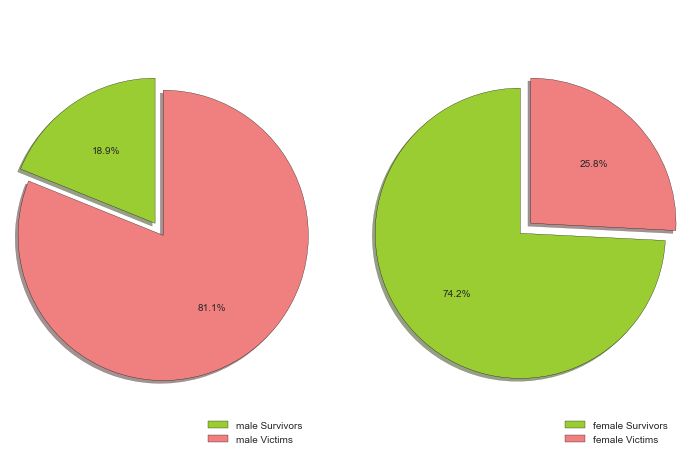

In [15]:
# Figure 1, Survivors Ratio by Gender
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session
show_chart_by_group('Sex')

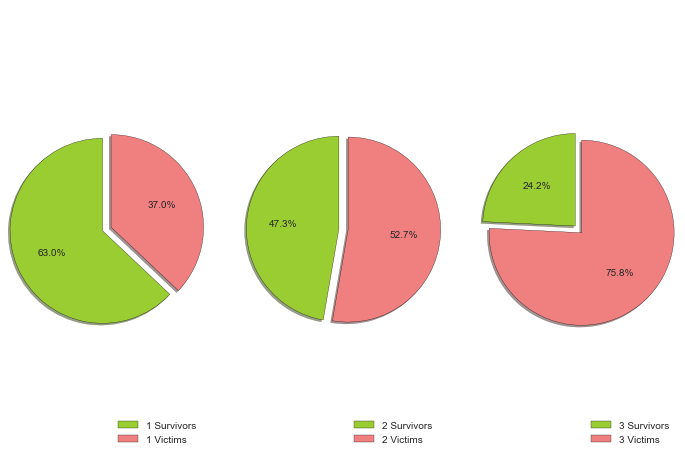

In [16]:
# Figure 2, Survivors Ratio by Passenage Class
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session
show_chart_by_group('Pclass')

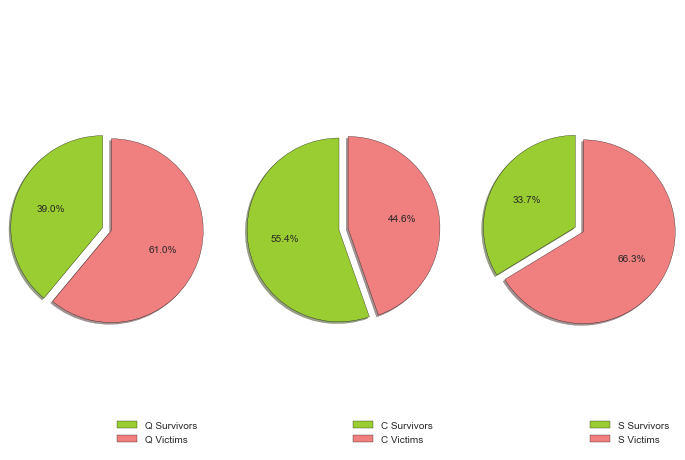

In [17]:
# Figure 3, Survivors Ratio by boarding port
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session
show_chart_by_group('Embarked')

Figure 4, Survivors number at different age range


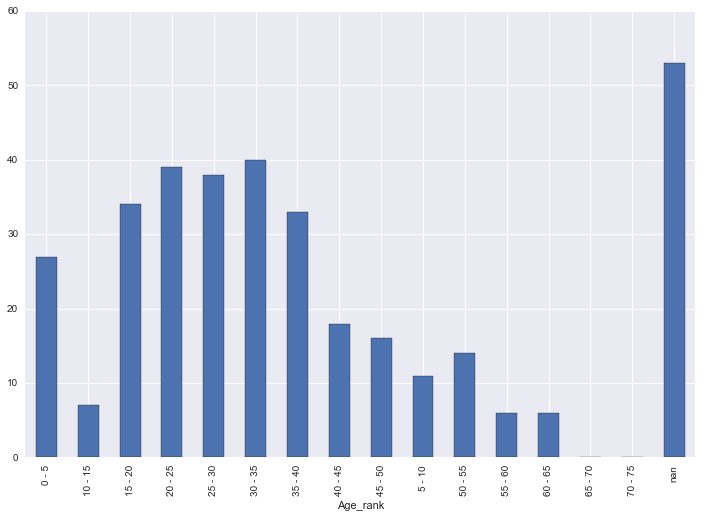

In [18]:
# Figure 4, Survivors number at different age range
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session
grouped_data_age = titanic_data.groupby('Age_rank')['Survived'].sum()
grouped_data_age.plot.bar()
print 'Figure 4, Survivors number at different age range'

Figure 5, Survivors rate at different age ranges


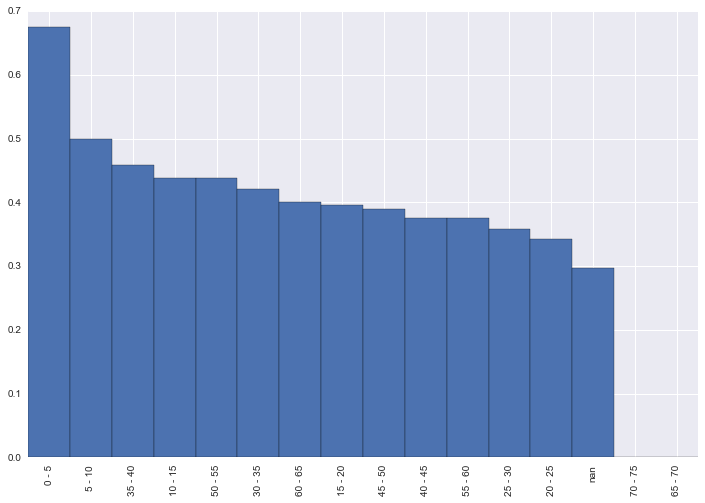

In [19]:
# Figure 5, Survivors rate at different age ranges
from operator import itemgetter
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session
d= survival_rate_by_group('Age_rank')
c = d.items()
c.sort(key=itemgetter(1), reverse=True)
labels, values = zip(*c)
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
print 'Figure 5, Survivors rate at different age ranges'

# References:
------

1. Data Descriptions, Titanic: Machine Learning from Disaster,kaggle, https://www.kaggle.com/c/titanic/data
2. The Truth Behind "Women and Children First", Titanic, The Artifact Exhibition, http://www.premierexhibitions.com/exhibitions/3/3/titanic-artifact-exhibition/blog/truth-behind-women-and-children-first
3. Third Class Life on the Titanic, ALookThruRime, https://alookthrutime.wordpress.com/2012/04/13/third-class-life-on-the-titanic/